# Timer

In [2]:
import time  
import os   
import subprocess 
import random

timeout = 3    
models_folder = '../models'  
models = [os.path.join(models_folder, f) for f in os.listdir(models_folder) if f.endswith('.mzn')]
random.shuffle(models)
instances_folder = '../instances'  
instances = [os.path.join(instances_folder, f) for f in os.listdir(instances_folder) if f.endswith('.dzn')] 
times = []
 
for model in models:  
    for instance in instances:  
        start_time = time.time()  
        # Run the minizinc command for the current model and data file  
        cmd = f"minizinc --solver Gecode --output-time {model} {instance}" 
        proc = subprocess.Popen(cmd, shell=True)
        try: 
            result = proc.wait(timeout=timeout)  
            elapsed_time = time.time() - start_time  
            print(f'{model} with {instance} SOLVED in {elapsed_time:.2f} seconds.')
            times.append(elapsed_time)
        except subprocess.TimeoutExpired: 
            print(f'{model} with {instance} TIMED OUT after {timeout} seconds.')
            times.append(timeout)
        finally:
            proc.terminate()
print("----FINISHED----")

grocerylist = array1d(1..10, [3, 0, 0, 3, 3, 2, 0, 0, 2, 1]);
acumprice = 35546;
totalItems = 14;
protein = 123;
carbo = 390;
fat = 183;
minPro = 0;
minCar = 0;
minFat = 0;
maxPro = 0;
maxCar = 0;
maxFat = 0;
mnt = 0;
% time elapsed: 0.37 s
----------
% time elapsed: 0.38 s
../models/anti_first_fail-indomain_min.mzn with ../instances/0.dzn SOLVED in 0.53 seconds.
grocerylist = array1d(1..10, [3, 0, 0, 3, 3, 2, 0, 0, 2, 1]);
acumprice = 35546;
totalItems = 14;
protein = 123;
carbo = 390;
fat = 183;
minPro = 0;
minCar = 0;
minFat = 0;
maxPro = 0;
maxCar = 0;
maxFat = 0;
mnt = 0;
% time elapsed: 0.30 s
----------
% time elapsed: 0.30 s
../models/most_constrained-indomain_split.mzn with ../instances/0.dzn SOLVED in 0.37 seconds.
grocerylist = array1d(1..10, [3, 0, 0, 3, 3, 2, 0, 0, 2, 1]);
acumprice = 35546;
totalItems = 14;
protein = 123;
carbo = 390;
fat = 183;
minPro = 0;
minCar = 0;
minFat = 0;
maxPro = 0;
maxCar = 0;
maxFat = 0;
mnt = 0;
% time elapsed: 0.13 s
----------
% time elapse

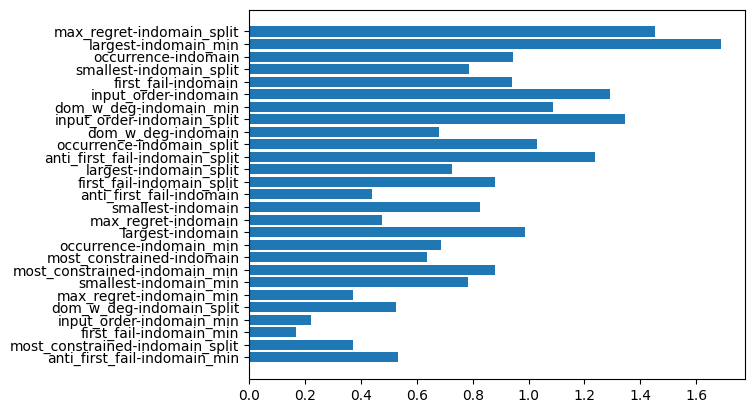

In [3]:
# importing the necessary libraries and modules 
import matplotlib.pyplot as plt 
   
models = [model for i, model in enumerate(models) if times[i] < timeout] 
# Remove "../models/" and ".mzn" 
models = [model.replace("../models/", "").replace(".mzn", "") for model in models]
times = [time for time in times if time < timeout]
    
# using the pyplot.barh funtion for the horizontal bar 
plt.barh(models,times)

# to show our graph 
plt.show()

In [4]:
import psutil

for proc in psutil.process_iter(['pid', 'name', 'username']):
    try:
        pinfo = proc.as_dict(attrs=['pid', 'name', 'username'])
        if 'jupyter' in pinfo['name']:
            print(pinfo)
    except (psutil.NoSuchProcess, psutil.AccessDenied, psutil.ZombieProcess):
        pass


{'name': 'jupyter-lab', 'username': 'sjmc', 'pid': 43}
